In [1]:
import geopandas
import pandas as pd
import os
import rasterio
from rasterio.plot import show
from rasterio.mask import mask
import matplotlib.pyplot as plt

## Loading the Data

In [2]:
data_folder = "./data"
data_files = { 
    "fire_dz": "viirs-jpss1_2024_Algeria.csv",
    "fire_tn": "viirs-jpss1_2024_Tunisia.csv",
    "landcover_dz": "landcover_dz/dza_gc_adg.shp",
    "landcover_tn": "landcover_tn/tun_gc_adg.shp", # updated the file
    "climate_prec": "wc2.1_cruts4.09_5m_prec_2020-2024",
    "climate_tmax": "wc2.1_cruts4.09_5m_tmax_2020-2024",
    "climate_tmin": "wc2.1_cruts4.09_5m_tmin_2020-2024",
    "elevation": "be15_grd/be15_grd",
    "dz_boundaries": "gadm41_DZA_shp/gadm41_DZA_0.shp",
    "tn_boundaries": "gadm41_TUN_shp/gadm41_TUN_0.shp",
    "soil": "HWSD2_RASTER/HWSD2.bil"
}

output_folder = "./processed_data"
output_folders = {
    "fire": "fire_dataset",
    "landcover": "landcover_dataset",
    "climate": "climate_dataset",
    "elevation": "elevation_dataset",
    "soil": "soil_dataset"
}

### Fire Dataset

#### For Algeria

In [3]:
fire_dz_filepath = os.path.join(data_folder, data_files["fire_dz"])
fire_dz_df = pd.read_csv(fire_dz_filepath)
fire_dz_df

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight,type
0,27.72818,9.87200,295.51,0.76,0.77,2024-01-01,3,N20,VIIRS,n,2,277.66,1.24,N,2
1,28.63288,9.77909,301.80,0.79,0.78,2024-01-01,3,N20,VIIRS,n,2,277.05,1.57,N,2
2,28.64012,9.77953,298.65,0.79,0.78,2024-01-01,3,N20,VIIRS,n,2,277.04,1.34,N,2
3,36.74886,6.25409,338.04,0.46,0.39,2024-01-01,141,N20,VIIRS,n,2,257.28,5.21,N,2
4,35.87978,4.44782,309.49,0.41,0.37,2024-01-01,141,N20,VIIRS,n,2,272.08,1.58,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87441,34.86016,-1.37439,337.17,0.43,0.46,2024-12-31,1331,N20,VIIRS,n,2,287.63,3.18,D,0
87442,35.80756,-0.34148,326.23,0.50,0.49,2024-12-31,1331,N20,VIIRS,n,2,282.76,3.58,D,2
87443,36.74493,6.25849,334.95,0.60,0.71,2024-12-31,1331,N20,VIIRS,n,2,286.65,4.28,D,2
87444,36.86816,6.98849,331.50,0.66,0.73,2024-12-31,1331,N20,VIIRS,n,2,285.38,4.55,D,2


In [4]:
fire_dz_df.describe()

,latitude,longitude,bright_ti4,scan,track,acq_time,version,bright_ti5,frp,type
count,87446.000000,87446.000000,87446.000000,87446.000000,87446.000000,87446.000000,87446.0,87446.000000,87446.000000,87446.000000
mean,31.398370,6.174013,321.170189,0.476433,0.516127,379.367941,2.0,291.711062,3.454114,1.703863
std,2.642515,2.563073,18.189028,0.101948,0.126665,479.842612,0.0,11.715804,5.018793,0.723168
min,19.603230,-8.118050,240.170000,0.320000,0.360000,0.000000,2.0,244.790000,0.060000,0.000000
25%,28.735780,5.585470,305.500000,0.400000,0.400000,59.000000,2.0,282.860000,1.160000,2.000000
50%,31.403925,6.475440,316.820000,0.450000,0.500000,141.000000,2.0,290.785000,2.080000,2.000000
75%,32.515890,7.906365,337.420000,0.540000,0.620000,232.000000,2.0,298.100000,3.940000,2.000000
max,37.022990,10.993650,367.000000,0.800000,0.780000,1410.000000,2.0,350.350000,251.890000,3.000000


#### For Tunisia

In [5]:
fire_tn_filepath = os.path.join(data_folder, data_files["fire_tn"])
fire_tn_df = pd.read_csv(fire_tn_filepath)
fire_tn_df

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight,type
0,31.64847,9.16945,315.79,0.53,0.50,2024-01-01,142,N20,VIIRS,n,2,279.09,2.20,N,2
1,31.49290,9.48947,302.32,0.56,0.51,2024-01-01,142,N20,VIIRS,n,2,276.10,1.23,N,0
2,31.49524,9.49053,301.88,0.56,0.51,2024-01-01,142,N20,VIIRS,n,2,276.12,0.77,N,0
3,33.36728,8.54768,302.58,0.45,0.47,2024-01-01,142,N20,VIIRS,n,2,277.15,0.80,N,2
4,31.64812,9.17107,320.80,0.46,0.39,2024-01-02,124,N20,VIIRS,n,2,278.37,2.44,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2799,31.65023,9.17049,308.73,0.50,0.41,2024-12-30,50,N20,VIIRS,n,2,278.50,1.21,N,2
2800,31.64881,9.17031,323.63,0.61,0.53,2024-12-31,31,N20,VIIRS,n,2,279.46,2.57,N,2
2801,31.65072,9.16963,320.75,0.61,0.53,2024-12-31,31,N20,VIIRS,n,2,279.13,3.50,N,2
2802,36.59308,10.31617,296.55,0.63,0.72,2024-12-31,210,N20,VIIRS,n,2,278.94,1.12,N,2


#### Combining the Datasets

In [6]:
# We add a country column for traceability
fire_dz_df["country"] = "DZ"
fire_tn_df["country"] = "TN"

fire_df = pd.concat([fire_dz_df, fire_tn_df])

fire_df

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight,type,country
0,27.72818,9.87200,295.51,0.76,0.77,2024-01-01,3,N20,VIIRS,n,2,277.66,1.24,N,2,DZ
1,28.63288,9.77909,301.80,0.79,0.78,2024-01-01,3,N20,VIIRS,n,2,277.05,1.57,N,2,DZ
2,28.64012,9.77953,298.65,0.79,0.78,2024-01-01,3,N20,VIIRS,n,2,277.04,1.34,N,2,DZ
3,36.74886,6.25409,338.04,0.46,0.39,2024-01-01,141,N20,VIIRS,n,2,257.28,5.21,N,2,DZ
4,35.87978,4.44782,309.49,0.41,0.37,2024-01-01,141,N20,VIIRS,n,2,272.08,1.58,N,2,DZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2799,31.65023,9.17049,308.73,0.50,0.41,2024-12-30,50,N20,VIIRS,n,2,278.50,1.21,N,2,TN
2800,31.64881,9.17031,323.63,0.61,0.53,2024-12-31,31,N20,VIIRS,n,2,279.46,2.57,N,2,TN
2801,31.65072,9.16963,320.75,0.61,0.53,2024-12-31,31,N20,VIIRS,n,2,279.13,3.50,N,2,TN
2802,36.59308,10.31617,296.55,0.63,0.72,2024-12-31,210,N20,VIIRS,n,2,278.94,1.12,N,2,TN


In [7]:
fire_df.describe()

,latitude,longitude,bright_ti4,scan,track,acq_time,version,bright_ti5,frp,type
count,90250.000000,90250.000000,90250.000000,90250.000000,90250.000000,90250.000000,90250.0,90250.000000,90250.000000,90250.000000
mean,31.476760,6.280033,321.091793,0.475991,0.515446,380.331623,2.0,291.726092,3.447776,1.690936
std,2.666477,2.593748,18.205551,0.101596,0.126508,480.710563,0.0,11.700269,5.222111,0.735207
min,19.603230,-8.118050,240.170000,0.320000,0.360000,0.000000,2.0,244.790000,0.060000,0.000000
25%,28.911510,5.642160,305.380000,0.400000,0.390000,59.000000,2.0,282.900000,1.150000,2.000000
50%,31.409125,6.557880,316.710000,0.450000,0.490000,140.000000,2.0,290.790000,2.060000,2.000000
75%,32.560313,8.083758,337.400000,0.540000,0.620000,232.000000,2.0,298.100000,3.920000,2.000000
max,37.323460,11.110350,367.000000,0.800000,0.780000,1410.000000,2.0,355.420000,251.890000,3.000000


In [ ]:
fire_df.info()

In [8]:
output_base = os.path.join(output_folder, output_folders["fire"])
os.makedirs(output_base, exist_ok=True)
output_filepath = os.path.join(output_base, "fire.csv")

fire_df.to_csv(output_filepath)

print(f"Saved combined fire DF to: {output_filepath}")

Saved combined fire DF to: ./processed_data/fire_dataset/fire.csv


### Land Cover Dataset

A land cover code is a classification system used to categorize the physical and biophysical attributes of the Earth's surface, such as forests, grasslands, water, or built-up areas. These codes are used in mapping and geographic information systems (GIS) to standardize and describe different types of land cover, with popular systems including the Land Cover Classification System (LCCS) developed by the UN Food and Agriculture Organization (FAO). 

### For Algeria

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 386454 entries, 0 to 386453
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   ID        386454 non-null  int32   
 1   GRIDCODE  386454 non-null  int32   
 2   AREA      386454 non-null  float64 
 3   LCCCODE   386454 non-null  object  
 4   geometry  386454 non-null  geometry
dtypes: float64(1), geometry(1), int32(2), object(1)
memory usage: 11.8+ MB
None
   ID  GRIDCODE          AREA       LCCCODE  \
0   4       210  6.228187e+06  7001 // 8001   
1   2       210  6.242408e+06  7001 // 8001   
2   1       210  1.482995e+06  7001 // 8001   
3   8        50  4.590841e+08  21497-121340   
4  13       210  6.371533e+06  7001 // 8001   

                                            geometry  
0  POLYGON ((6.41528 37.08696, 6.43103 37.0855, 6...  
1  POLYGON ((7.18084 37.07917, 7.17998 37.08091, ...  
2  POLYGON ((7.37137 37.08194, 7.3709 37.08717, 7...  
3  POLYGON 

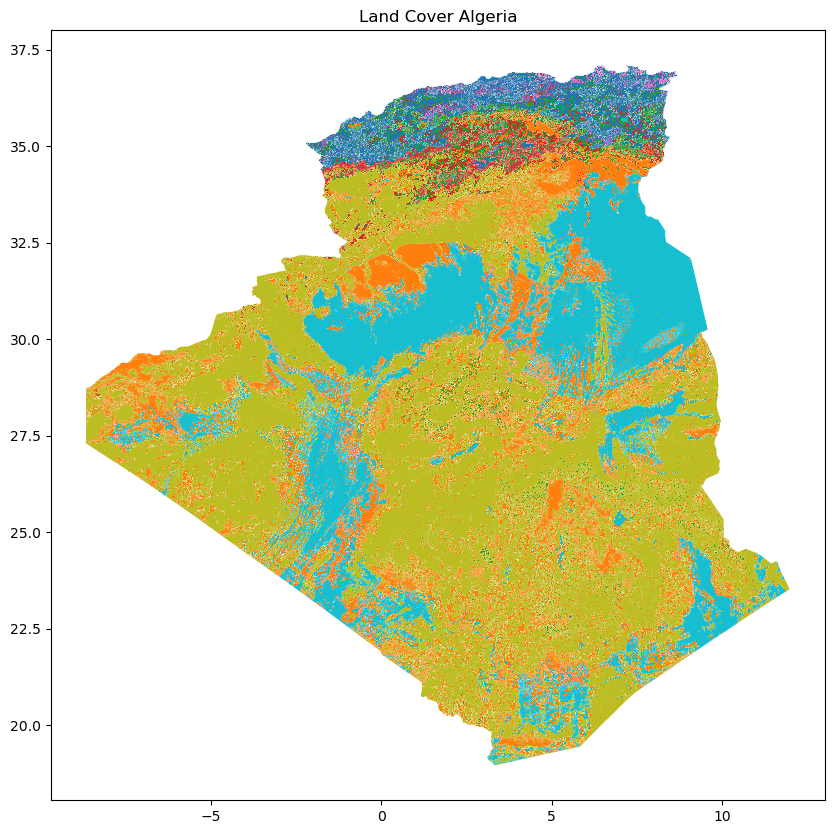

In [9]:
landcover_dz_filepath = os.path.join(data_folder, data_files["landcover_dz"])

# Read the shapefile into a GeoDataFrame
landcover_dz_gdf = geopandas.read_file(landcover_dz_filepath)

print(landcover_dz_gdf.info())

print(landcover_dz_gdf.head())
import matplotlib.pyplot as plt
landcover_dz_gdf.plot(column='LCCCODE', legend=False, figsize=(10, 10))
plt.title('Land Cover Algeria')

plt.show()

### For Tunisia

In [10]:
landcover_tn_filepath = os.path.join(data_folder, data_files["landcover_tn"])

# Read the shapefile into a GeoDataFrame
landcover_tn_gdf = geopandas.read_file(landcover_tn_filepath)

print(landcover_tn_gdf.info())

print(landcover_tn_gdf.head())


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 52059 entries, 0 to 52058
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   AREA_M2   52059 non-null  float64 
 1   ID        52059 non-null  int32   
 2   GRIDCODE  52059 non-null  int32   
 3   LCCCode   52059 non-null  object  
 4   geometry  52059 non-null  geometry
dtypes: float64(1), geometry(1), int32(2), object(1)
memory usage: 1.6+ MB
None
     AREA_M2  ID  GRIDCODE                  LCCCode  \
0  3110936.0   1       210             7001 // 8001   
1   982723.0   3        20              0003 / 0004   
2   151388.0   2        30             0004 // 0003   
3   151391.0   6       120  21454 // 21446 // 21450   
4   151391.0   4        70             21499-121340   

                                            geometry  
0  POLYGON ((8.89941 37.52083, 8.89923 37.52117, ...  
1  POLYGON ((8.94028 37.52361, 8.94028 37.52917, ...  
2  POLYGON ((8.94583 37.5347

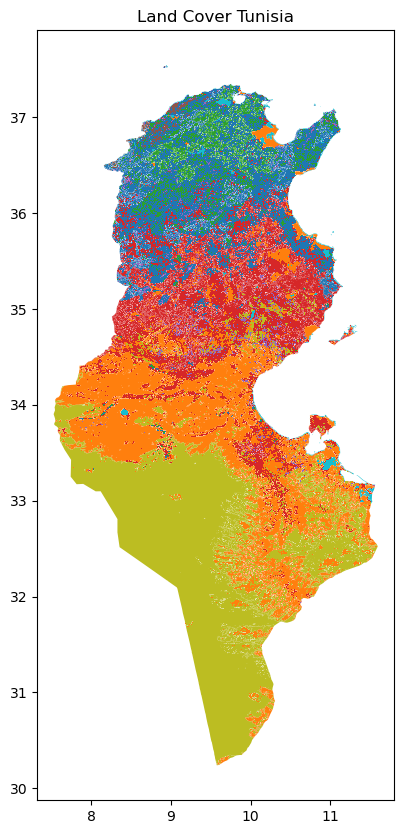

In [11]:
landcover_tn_gdf.plot(column='LCCCode', legend=False, figsize=(10, 10))
plt.title('Land Cover Tunisia')
plt.show()

#### Merging Landcover Data

In [12]:
landcover_tn_gdf = landcover_tn_gdf.rename(columns={'LCCCode': 'LCCCODE', 'AREA_M2': 'AREA'})

In [13]:
landcover_dz_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 386454 entries, 0 to 386453
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   ID        386454 non-null  int32   
 1   GRIDCODE  386454 non-null  int32   
 2   AREA      386454 non-null  float64 
 3   LCCCODE   386454 non-null  object  
 4   geometry  386454 non-null  geometry
dtypes: float64(1), geometry(1), int32(2), object(1)
memory usage: 11.8+ MB


In [14]:
def merge_shapefiles(dz_gdf, tn_gdf):
    # Ensure both shapefiles use the same CRS 
    if dz_gdf.crs != tn_gdf.crs:
        tn = tn.to_crs(dz_gdf.crs)

    # Concatenate the GeoDataFrames
    boundaries = geopandas.GeoDataFrame(pd.concat([dz_gdf, tn_gdf], ignore_index=True), crs=dz_gdf.crs)

    return boundaries


In [15]:
landcover_gdf = merge_shapefiles(landcover_dz_gdf, landcover_tn_gdf)
landcover_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 438513 entries, 0 to 438512
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   ID        438513 non-null  int32   
 1   GRIDCODE  438513 non-null  int32   
 2   AREA      438513 non-null  float64 
 3   LCCCODE   438513 non-null  object  
 4   geometry  438513 non-null  geometry
dtypes: float64(1), geometry(1), int32(2), object(1)
memory usage: 13.4+ MB


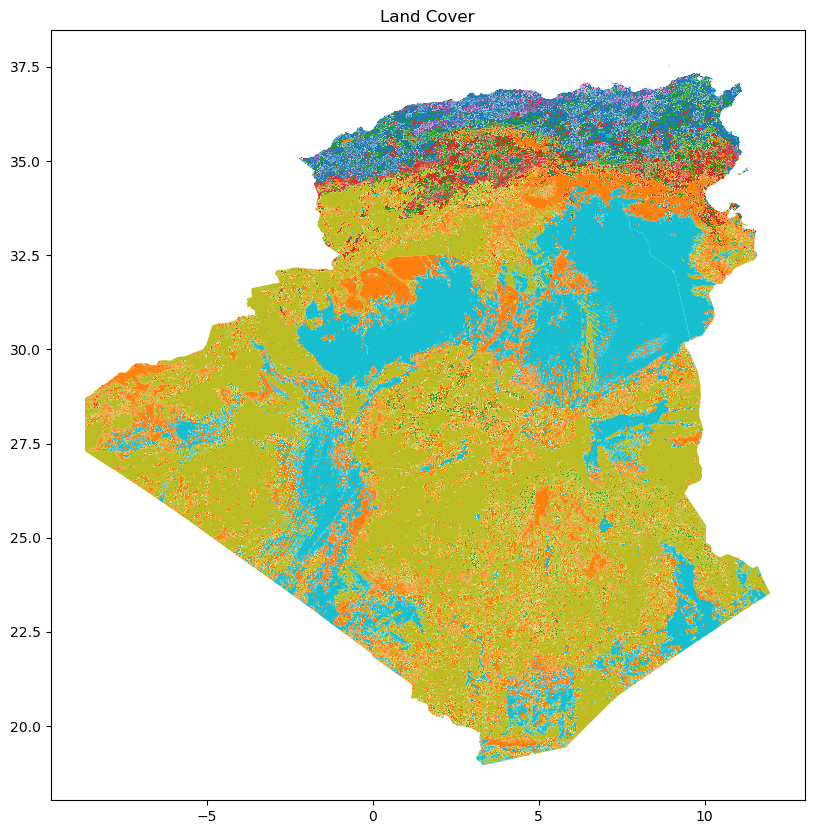

In [16]:
landcover_gdf.plot(column='LCCCODE', legend=False, figsize=(10, 10))
plt.title('Land Cover')
plt.show()

#### Converting to Lat-Long

In [17]:
print(landcover_tn_gdf.crs)

landcover_tn_gdf = landcover_tn_gdf.to_crs(epsg=4326)

def get_coords(geom):
    if geom.geom_type == 'Polygon':
        return list(geom.exterior.coords)
    else:
        return None

landcover_tn_gdf["coordinates"] = landcover_tn_gdf["geometry"].apply(get_coords)

landcover_tn_gdf
landcover_tn_gdf[:10].drop(columns="geometry").to_csv("test_tn_csv.csv", index=False)


EPSG:4326


### Climate Dataset

##### Reading one instance

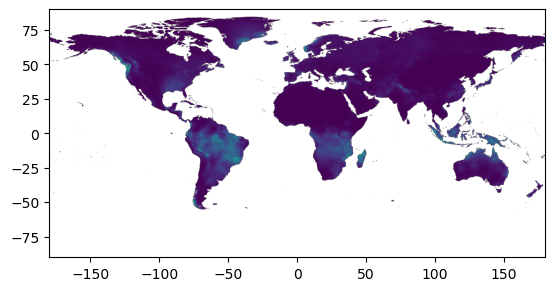

(1, 2160, 4320)


In [18]:
file = os.path.join(data_folder, data_files["climate_prec"], "wc2.1_cruts4.09_5m_prec_2020-01.tif")
src = rasterio.open(file)
show(src)

# Checking the number of bands
array = src.read()
print(array.shape)

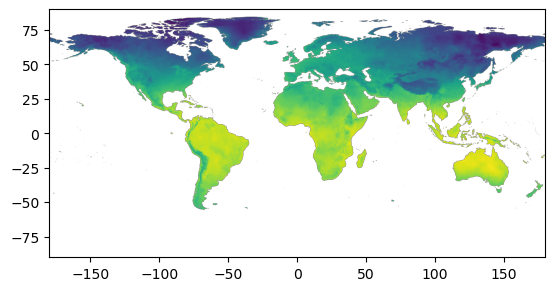

(1, 2160, 4320)


In [19]:
file = os.path.join(data_folder, data_files["climate_tmin"], "wc2.1_cruts4.09_5m_tmin_2020-01.tif")
src = rasterio.open(file)
show(src)

# Checking the number of bands
array = src.read()
print(array.shape)

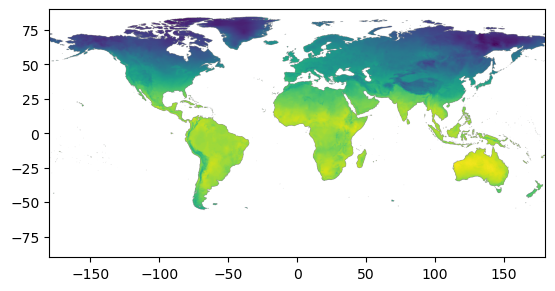

(1, 2160, 4320)


In [20]:
file = os.path.join(data_folder, data_files["climate_tmax"], "wc2.1_cruts4.09_5m_tmax_2020-01.tif")
src = rasterio.open(file)
show(src)

# Checking the number of bands
array = src.read()
print(array.shape)

##### Loading and merging the boundaries of Algeria and Tunisia

In [21]:
def load_dz_tn_boundaries(dz_shapefile_path, tn_shapefile_path):
    dz = geopandas.read_file(dz_shapefile_path)
    tn = geopandas.read_file(tn_shapefile_path)

    # Ensure both shapefiles use the same CRS 
    if dz.crs != tn.crs:
        tn = tn.to_crs(dz.crs)

    # Concatenate the GeoDataFrames
    boundaries = geopandas.GeoDataFrame(pd.concat([dz, tn], ignore_index=True), crs=dz.crs)

    return boundaries

# Shapefile downloaded from https://gadm.org/

In [22]:
dz_boundaries_filepath = os.path.join(data_folder, data_files["dz_boundaries"])
tn_boundaries_filepath = os.path.join(data_folder, data_files["tn_boundaries"])

boundaries = load_dz_tn_boundaries(dz_boundaries_filepath, tn_boundaries_filepath)

##### Clipping one worldwide raster instance to the ROI

In [23]:
def clip_instance(file, boundaries=boundaries):
    with rasterio.open(file) as src:
        # Clip raster with shapefile
        out_image, out_transform = mask(src, boundaries.geometry, crop=True)
        out_meta = src.meta.copy()
    
    # Update metadata
    out_meta.update({
        "driver": "GTiff",
        "height": out_image.shape[1],
        "width": out_image.shape[2],
        "transform": out_transform
    })

    return out_image, out_meta

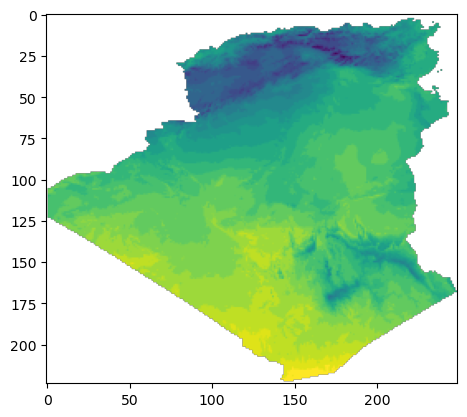

<Axes: >

In [24]:
# PoC
show(clip_instance(file)[0])

In [25]:
output_base = os.path.join(output_folder, output_folders["climate"])

for var in ["climate_prec", "climate_tmax", "climate_tmin"]:
    climate_folder = os.path.join(data_folder, data_files[var])

    for filename in os.listdir(climate_folder):
        if filename.endswith(".tif") and "2024" in filename:
            filepath = os.path.join(climate_folder, filename)
            try:
                # Clip raster
                clipped_image, clipped_meta = clip_instance(filepath, boundaries)

                # Save output
                save_path = os.path.join(output_base, var.split("_")[1])  # prec | tmax | tmin
                os.makedirs(save_path, exist_ok=True)

                output_filename = f"clipped_{filename}"
                output_filepath = os.path.join(save_path, output_filename)

                with rasterio.open(output_filepath, "w", **clipped_meta) as dest:
                    dest.write(clipped_image)

                print(f"Saved clipped raster to: {output_filepath}")

            except Exception as e:
                print(f"Error processing {filename}: {e}")

Saved clipped raster to: ./processed_data/climate_dataset/prec/clipped_wc2.1_cruts4.09_5m_prec_2024-05.tif
Saved clipped raster to: ./processed_data/climate_dataset/prec/clipped_wc2.1_cruts4.09_5m_prec_2024-04.tif
Saved clipped raster to: ./processed_data/climate_dataset/prec/clipped_wc2.1_cruts4.09_5m_prec_2024-01.tif
Saved clipped raster to: ./processed_data/climate_dataset/prec/clipped_wc2.1_cruts4.09_5m_prec_2024-03.tif
Saved clipped raster to: ./processed_data/climate_dataset/prec/clipped_wc2.1_cruts4.09_5m_prec_2024-07.tif
Saved clipped raster to: ./processed_data/climate_dataset/prec/clipped_wc2.1_cruts4.09_5m_prec_2024-09.tif
Saved clipped raster to: ./processed_data/climate_dataset/prec/clipped_wc2.1_cruts4.09_5m_prec_2024-02.tif
Saved clipped raster to: ./processed_data/climate_dataset/prec/clipped_wc2.1_cruts4.09_5m_prec_2024-10.tif
Saved clipped raster to: ./processed_data/climate_dataset/prec/clipped_wc2.1_cruts4.09_5m_prec_2024-11.tif
Saved clipped raster to: ./processed_

### Elevation Dataset

In [26]:
grid_path = os.path.join(data_folder, data_files["elevation"])  
with rasterio.open(grid_path) as src:
    print(src.driver)    
    print(src.width, src.height, src.shape)
    print(src.crs)
    print(src.bounds)
    arr = src.read(1) 
    print(arr.shape)

AIG
86400 33600 (33600, 86400)
EPSG:4326
BoundingBox(left=-180.00013888888893, bottom=-56.00013888888891, right=179.99986111111085, top=83.999861111111)
(33600, 86400)


In [27]:
img_elevation, meta_elevation = clip_instance(grid_path)

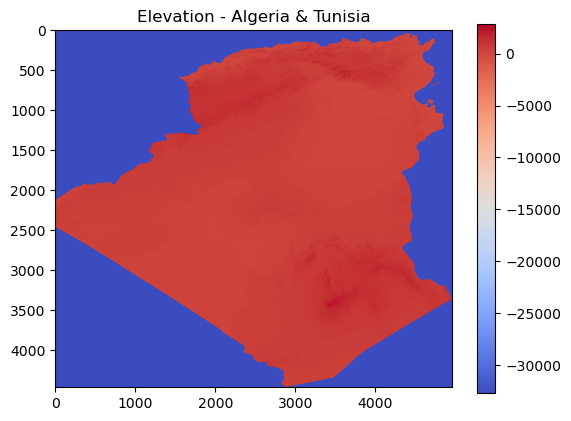

In [28]:
plt.imshow(img_elevation[0], cmap='coolwarm')
plt.title("Elevation - Algeria & Tunisia")
plt.colorbar()
plt.show()

In [29]:
output_base = os.path.join(output_folder, output_folders["elevation"])
os.makedirs(output_base, exist_ok=True)
output_filepath = os.path.join(output_base, "Elevation_DZ_TN.tif")
with rasterio.open(output_filepath, "w", **meta_elevation) as dest:
    dest.write(img_elevation)

print(f"Saved clipped raster to: {output_filepath}")

Saved clipped raster to: ./processed_data/elevation_dataset/Elevation_DZ_TN.tif


### Soil Dataset

In [30]:
soil_filepath = os.path.join(data_folder, data_files["soil"])
with rasterio.open(soil_filepath) as src:
    print(src.driver)    
    print(src.width, src.height, src.shape)
    print(src.crs)
    print(src.bounds)
    arr = src.read(1) 
    print(arr.shape)

EHdr
43200 21600 (21600, 43200)
OGC:CRS84
BoundingBox(left=-179.99999999999966, bottom=-89.99999999999996, right=180.00000000000017, top=89.99999999999996)
(21600, 43200)


In [31]:
import numpy as np

unique_ids = np.unique(arr)
print(unique_ids[:10], len(unique_ids))

[ 2 36 37 38 39 41 44 45 47 50] 29470


In [32]:
img, meta = clip_instance(soil_filepath)

In [ ]:
print(img)

[[[65535 65535 65535 ... 65535 65535 65535]
  [65535 65535 65535 ... 65535 65535 65535]
  [65535 65535 65535 ... 65535 65535 65535]
  ...
  [65535 65535 65535 ... 65535 65535 65535]
  [65535 65535 65535 ... 65535 65535 65535]
  [65535 65535 65535 ... 65535 65535 65535]]]


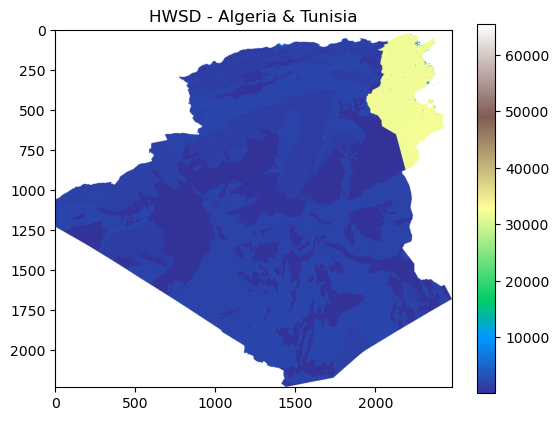

In [34]:
plt.imshow(img[0], cmap='terrain')
plt.title("HWSD - Algeria & Tunisia")
plt.colorbar()
plt.show()

#### Reading the Database

Step1:
- `sudo apt install mdbtools`

Step2:
- `mdb-export HWSD2.mdb HWSD2_LAYERS > HWSD2_LAYERS.csv`

In [35]:
layers_df = pd.read_csv('./data/HWSD2_RASTER/HWSD2_LAYERS.csv')
layers_df = layers_df[layers_df['LAYER'] == 'D1']
layers_df['LAYER'].value_counts()

/tmp/ipykernel_8320/2865934819.py:1: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  layers_df = pd.read_csv('./data/HWSD2_RASTER/HWSD2_LAYERS.csv')


LAYER
D1    58405
Name: count, dtype: int64

In [36]:
layers_df.groupby('HWSD2_SMU_ID')['SHARE'].value_counts()

HWSD2_SMU_ID  SHARE
2             10       2
              30       1
              50       1
36            100      1
37            30       1
                      ..
49826         100      1
49827         100      1
49828         100      1
49829         100      1
49830         100      1
Name: count, Length: 51706, dtype: int64

In [37]:
unique_smu_ids = np.unique(layers_df['HWSD2_SMU_ID'])
print(unique_smu_ids[:10])
print(unique_ids[:10])

print(all([raster_id in unique_smu_ids for raster_id in unique_ids]))

[ 2 36 37 38 39 41 44 45 47 50]
[ 2 36 37 38 39 41 44 45 47 50]
False


In [38]:
features_oi = [
    "COARSE", "SAND", "SILT", "CLAY", "TEXTURE_USDA", "TEXTURE_SOTER",
    "BULK", "REF_BULK", "ORG_CARBON", "PH_WATER", "TOTAL_N", "CN_RATIO",
    "CEC_SOIL", "CEC_CLAY", "CEC_EFF", "TEB", "BSAT", "ALUM_SAT", "ESP",
    "TCARBON_EQ", "GYPSUM", "ELEC_COND"
]

layers_df[features_oi].info()

<class 'pandas.core.frame.DataFrame'>
Index: 58405 entries, 666 to 408828
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   COARSE         58405 non-null  int64  
 1   SAND           58405 non-null  int64  
 2   SILT           58405 non-null  int64  
 3   CLAY           58405 non-null  int64  
 4   TEXTURE_USDA   57116 non-null  float64
 5   TEXTURE_SOTER  58405 non-null  object 
 6   BULK           58405 non-null  float64
 7   REF_BULK       57116 non-null  float64
 8   ORG_CARBON     57733 non-null  float64
 9   PH_WATER       58405 non-null  float64
 10  TOTAL_N        58405 non-null  float64
 11  CN_RATIO       58405 non-null  int64  
 12  CEC_SOIL       58405 non-null  int64  
 13  CEC_CLAY       58405 non-null  int64  
 14  CEC_EFF        58405 non-null  int64  
 15  TEB            58405 non-null  int64  
 16  BSAT           58405 non-null  int64  
 17  ALUM_SAT       58405 non-null  int64  
 18  ESP     

In [39]:
layers_df['TEXTURE_SOTER'].value_counts()

TEXTURE_SOTER
M    43216
C     8007
F     5869
-     1289
V       24
Name: count, dtype: int64

In [40]:
layers_df['TEXTURE_USDA'].value_counts()

TEXTURE_USDA
9.0     21935
11.0    13373
5.0      8570
3.0      3623
12.0     3230
10.0     3184
7.0      2976
8.0       194
4.0        31
Name: count, dtype: int64

In [41]:
features_oi_cat = [
    "TEXTURE_USDA", "TEXTURE_SOTER",
]

features_oi_num = features_oi

for cat_feature in features_oi_cat:
    features_oi_num.remove(cat_feature)

In [42]:
def weighted_avg(group):
    weights = group['SHARE'] / 100.0  # Convert percent to fraction
    result = {}
    for feature in features_oi_num:
        values = group[feature]
        if np.issubdtype(values.dtype, np.number):
            result[feature] = np.average(values, weights=weights) if weights.sum() > 0 else np.nan
        else:
            result[feature] = np.nan  # skip non-numeric fields
    return pd.Series(result)

# Apply the function to each group
soil_df = layers_df.groupby('HWSD2_SMU_ID').apply(weighted_avg).reset_index()

/tmp/ipykernel_8320/1242100999.py:13: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  soil_df = layers_df.groupby('HWSD2_SMU_ID').apply(weighted_avg).reset_index()


In [43]:
def most_common_texture(group, column):
    counts = group[column].value_counts()
    return counts.index[0] if not counts.empty else np.nan


soil_df['TEXTURE_USDA'] = layers_df.groupby('HWSD2_SMU_ID').apply(
    lambda g: most_common_texture(g, 'TEXTURE_USDA')
).reset_index(drop=True)

soil_df['TEXTURE_SOTER'] = layers_df.groupby('HWSD2_SMU_ID').apply(
    lambda g: most_common_texture(g, 'TEXTURE_SOTER')
).reset_index(drop=True)

/tmp/ipykernel_8320/1330696623.py:6: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  soil_df['TEXTURE_USDA'] = layers_df.groupby('HWSD2_SMU_ID').apply(
/tmp/ipykernel_8320/1330696623.py:10: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  soil_df['TEXTURE_SOTER'] = layers_df.groupby('HWSD2_SMU_ID').apply(


In [44]:
soil_df.head()

,HWSD2_SMU_ID,COARSE,SAND,SILT,CLAY,BULK,REF_BULK,ORG_CARBON,PH_WATER,TOTAL_N,...,CEC_EFF,TEB,BSAT,ALUM_SAT,ESP,TCARBON_EQ,GYPSUM,ELEC_COND,TEXTURE_USDA,TEXTURE_SOTER
0,2,15.7,55.2,22.6,22.2,1.384,1.746,1.4977,5.77,1.099,...,7.9,6.4,60.2,13.8,2.1,0.0,0.06,0.5,10.0,M
1,36,-4.0,-4.0,-4.0,-4.0,-4.000,NaN,-4.0000,-4.00,-4.000,...,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.00,-4.0,NaN,-
2,37,4.0,54.1,14.0,31.9,1.357,1.781,1.5601,5.02,1.386,...,4.5,3.8,32.8,15.1,1.6,0.0,0.03,0.0,12.0,C
3,38,14.4,45.2,21.0,33.8,1.316,1.870,2.1106,5.30,1.588,...,6.6,5.4,36.2,14.0,1.6,0.0,0.64,0.4,3.0,M
4,39,4.9,40.9,20.9,38.2,1.264,1.922,1.8535,4.87,1.674,...,6.0,4.4,28.9,38.8,1.3,0.0,0.00,0.3,3.0,F


In [45]:
output_base = os.path.join(output_folder, output_folders["soil"])
os.makedirs(output_base, exist_ok=True)
output_filepath = os.path.join(output_base, "HWSD_DZ_TN.tif")
with rasterio.open(output_filepath, "w", **meta) as dest:
    dest.write(img)

print(f"Saved clipped raster to: {output_filepath}")

Saved clipped raster to: ./processed_data/soil_dataset/HWSD_DZ_TN.tif
